# Computing the partial autocorrelation function (PACF)

In this notebook we show how we can compute the PACF and PACF plots.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Datasets" from this repo.

## Data Set Synopsis

The timeseries is collected between January 1992 and May 2016.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import STL

sns.set_context("talk")

# Computing the PACF for a white noise timeseries

Let's compute the PACF on a time series of white noise where each observation is generated by random from a normal distribution so there is no predictive information in any historic point:

$$y_t = noise_t$$ where $$noise_{t}  \sim  N(mean, std)$$

We expect the autocorrelation to be small at all lags as each data point is completely independent of each other.

In [2]:
num_timesteps = 300  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


Text(0.5, 0, 'Time')

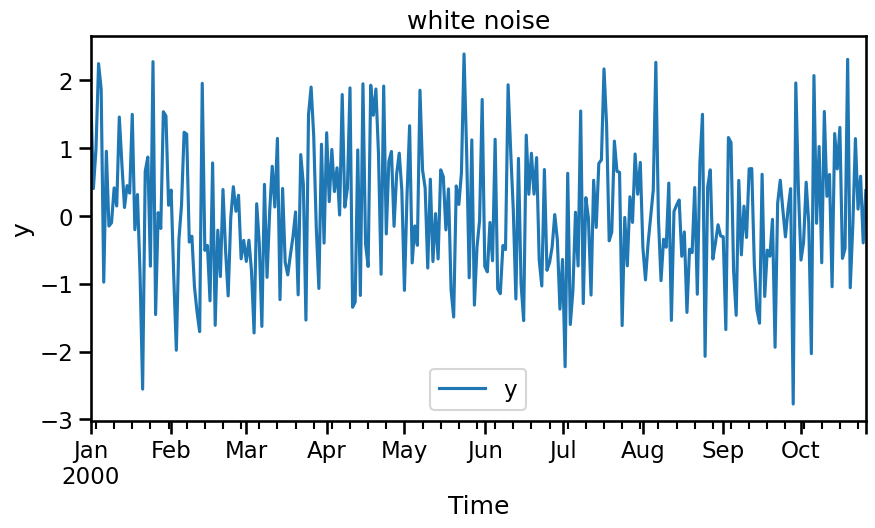

In [3]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("white noise")
ax.set_ylabel("y")
ax.set_xlabel("Time")

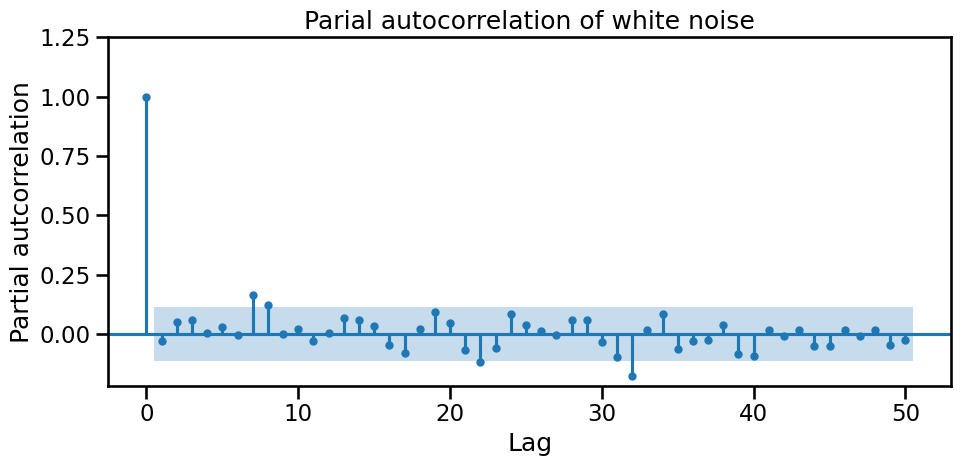

In [4]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y"],
    method="ywmle",
    lags=50,
    ax=ax,
    alpha=0.05,
    auto_ylims=True

);
ax.set_title("Parial autocorrelation of white noise")
ax.set_ylabel("Partial autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

 - The partial autocorrelation is one at lag 0 as expected.
 - The partial autocorrelation at all other lags are not significant. As expected from white noise.


We saw clearly that there is no correlation in the lag plots shown in notebook 3 on the ACF.

Now let's look at some timeseries with more structure and see what the PACF looks like.

# AR(1) process - a time series determined by lag 1 

Let's look at the PACF of an AR(1) process. As a reminder an AR(1) process is defined as:

$$y_t = \phi y_{{t-1}} + noise_t$$ where $$noise_{t}  \sim  N(mean=0, std=1)$$ $$|\phi| < 1 $$

Now let's generate an example of a timeseries from an AR1 process.

In [5]:
# Initial parameters
num_timesteps = 1000  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time
phi = 0.9
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Generate time series
y = np.zeros(num_timesteps)
for t in range(1, num_timesteps):
    noise = np.random.normal()
    y[t] = phi * y[t - 1] + noise

df = pd.DataFrame(data={"y": y}, index=ts)

Text(0.5, 0, 'Time')

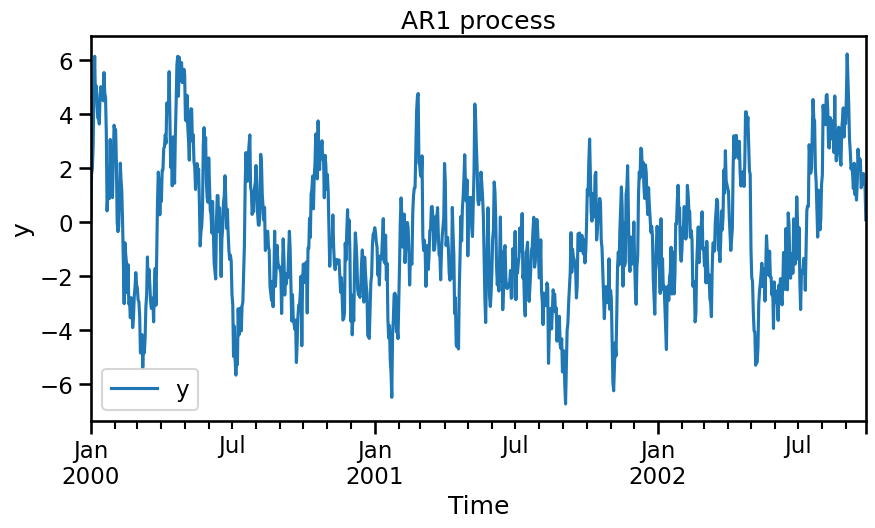

In [6]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("AR1 process")
ax.set_ylabel("y")
ax.set_xlabel("Time")

Let's plot the ACF and PACF now.

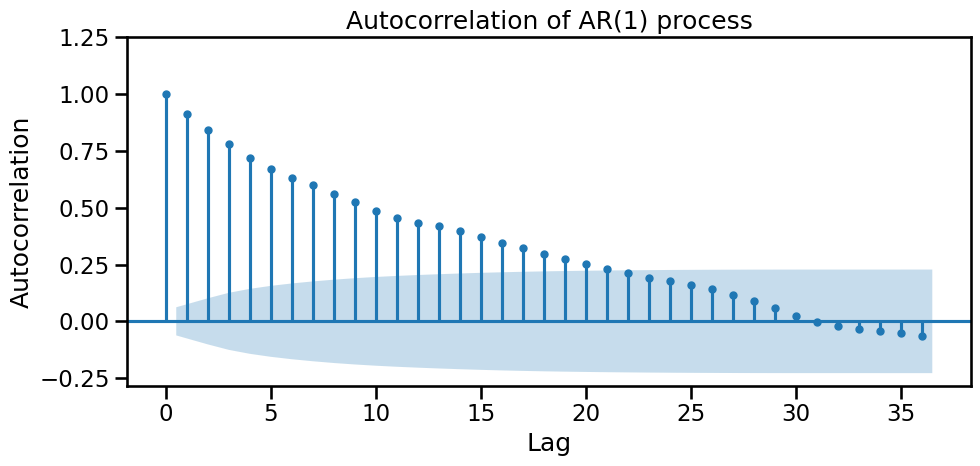

In [7]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True

)
ax.set_title("Autocorrelation of AR(1) process")
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

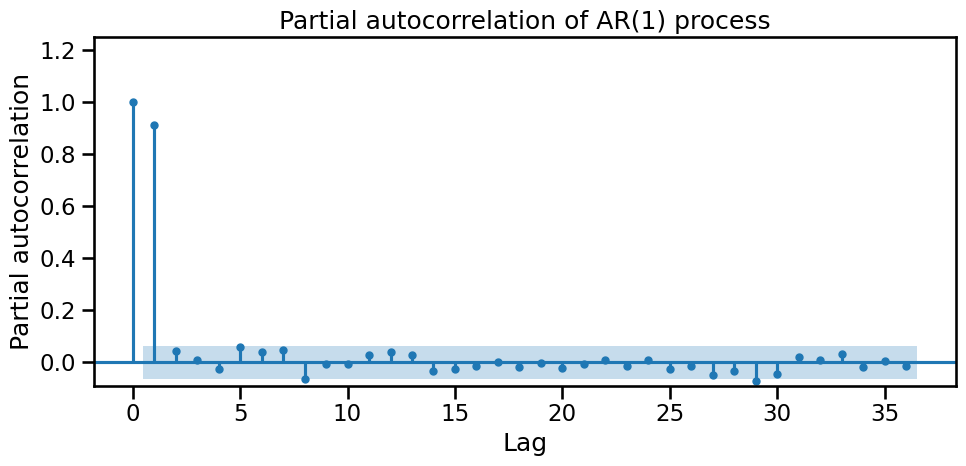

In [8]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
    method='ywmle', # Recommended method in Statsmodels notes
    auto_ylims=True
)
ax.set_title("Partial autocorrelation of AR(1) process")
ax.set_ylabel("Partial autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

The PACF is large for k = 1 and not significant for k > 2 as we wanted! Hence, the PACF can identify in this case that lag 1 is important.


# AR(2) process - a time series determined by lag 1 and lag 2

Let's create a toy time series which combines a lag of 1 and a lag of 2.

$$y_t = \phi_1 y_{{t-1}} + \phi_2 y_{{t-2}} + noise_t$$ where $$noise_{t}  \sim  N(mean=0, std=1)$$

For the AR(1) process to be stationary (i.e., the mean and variance don't change over time) we required $|\phi|<1$. To ensure that an AR(2) process remains stationary it can be shown the following constraints on $\phi_{1}$ and $\phi_{2}$ are required [1]: 

$$\phi_1 + \phi_2<1$$
$$-\phi_1 + \phi_2<1$$
$$\phi_2 > -1$$

[1] Page 60, George, E. P. "Box. Time series analysis: forecasting and control." (1970). 

Now let's generate an example of a timeseries from an AR2 process.

In [9]:
# Initial parameters
num_timesteps = 1000  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time
phi_1 = 0.7
phi_2 = 0.2
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Generate time series
y = np.zeros(num_timesteps)
for t in range(2, num_timesteps):
    noise = np.random.normal()
    y[t] = phi_1 * y[t - 1] + phi_2 * y[t - 2] + noise

df = pd.DataFrame(data={"y": y}, index=ts)

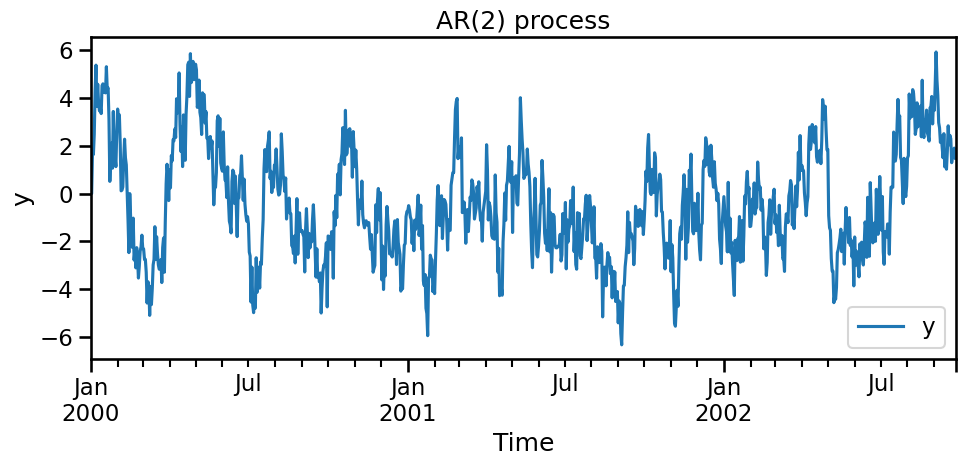

In [10]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("AR(2) process")
ax.set_ylabel("y")
ax.set_xlabel("Time")
plt.tight_layout()

Now let's plot the ACF and PACF for the timesere we generated from the AR(2) process.

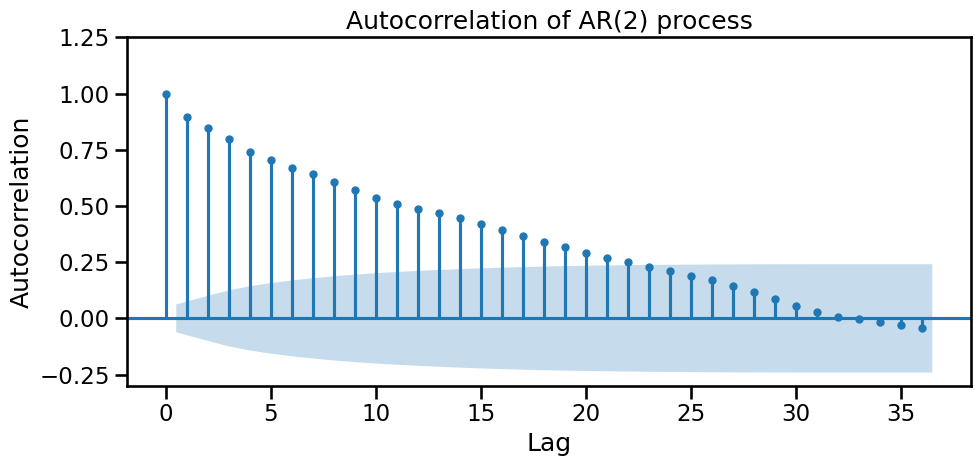

In [11]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of AR(2) process")
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

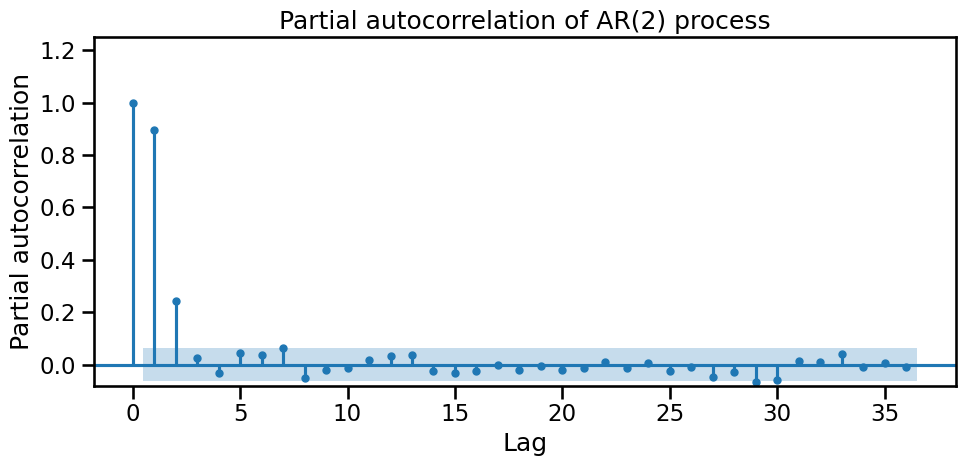

In [12]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True,
    method='ywmle', # Recommended method in Statsmodels notes

)
ax.set_title("Partial autocorrelation of AR(2) process")
ax.set_ylabel("Partial autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

- The PACF has significant lags at k=1 and k=2 is zero for k>0 as we wanted! 
- The PACF is larger for k=1 than k=2 because $|\phi_1|$ > $|\phi_2|$.
- This shows that the PACF can identify useful lags in this scenario.


Now let's move onto a time series with trend and seasonality.

# Time series with trend and seasonality

In [13]:
# Load retail sales dataset with the artificially added outliers
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

In [22]:
df.head()

,y,lowess,y_detrend
ds,,,
1992-01-01,146376,156224.385686,-9848.385686
1992-02-01,147079,157578.127266,-10499.127266
1992-03-01,159336,158916.267408,419.732592
1992-04-01,163669,160244.261688,3424.738312
1992-05-01,170068,161568.493429,8499.506571


Let's plot the time series

Text(0.5, 0, 'Time')

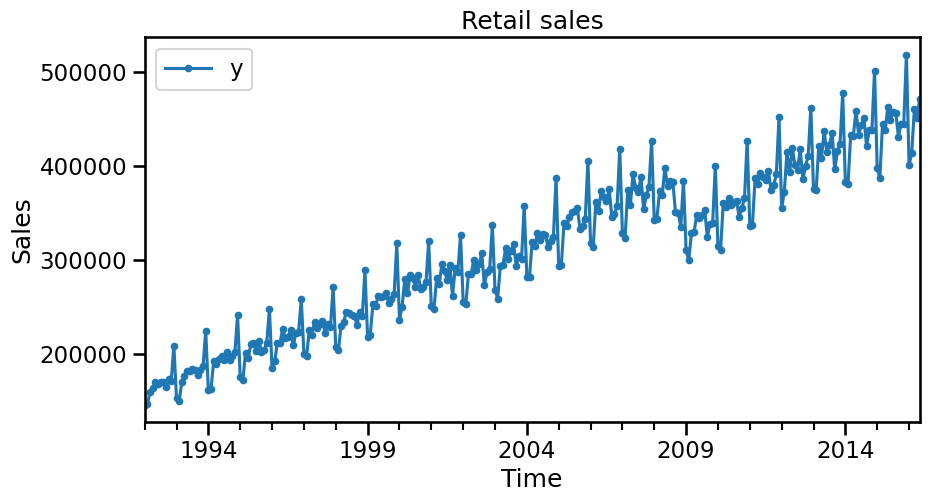

In [14]:
ax = df.plot(y="y", marker=".", figsize=[10, 5])
ax.set_title("Retail sales")
ax.set_ylabel("Sales")
ax.set_xlabel("Time")

Let's plot the ACF and PACF.

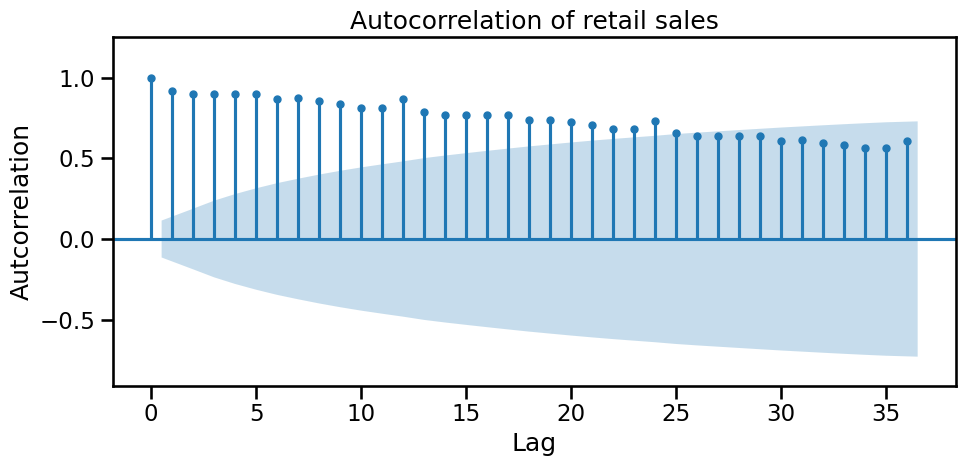

In [15]:
# Plot the auto-correlation 
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df["y"],
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of retail sales")
ax.set_ylabel("Autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

 - The autocorrelation is one at lag 0 as expected.
 - The autocorrelation decays slowly due to the strong trend.
 - There are peaks at multiples of the seasonal lag of 12 due to the seasonality.

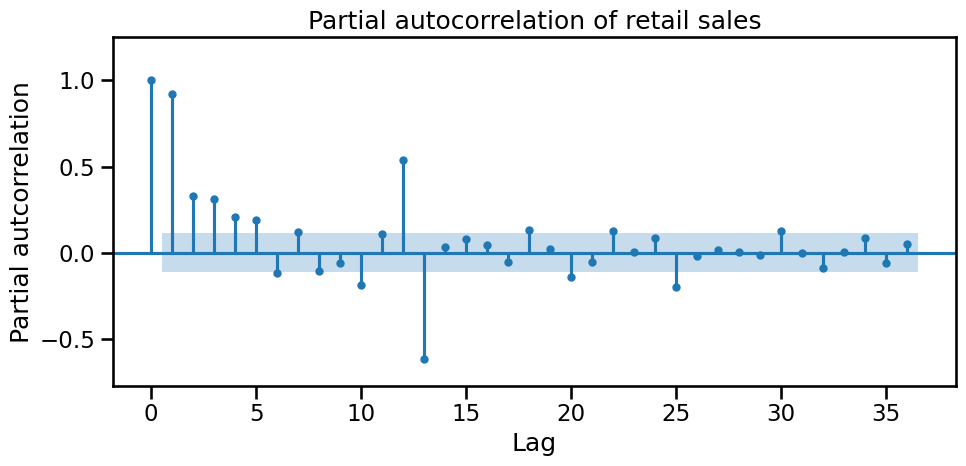

In [16]:
# Plot the partial auto-correlation

fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y"],
    method='ywmle', # Recommended method in Statsmodels notes
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Partial autocorrelation of retail sales")
ax.set_ylabel("Partial autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

- The PACF assumes the time series is stationary. 
- This time series is clearly not stationary. The trend means that the mean changes in time. 
- Despite that you still see can still see a strong peak at k=12 and the smaller lags.

Let's remove the trend and re-examine the PACF.

<Axes: xlabel='ds'>

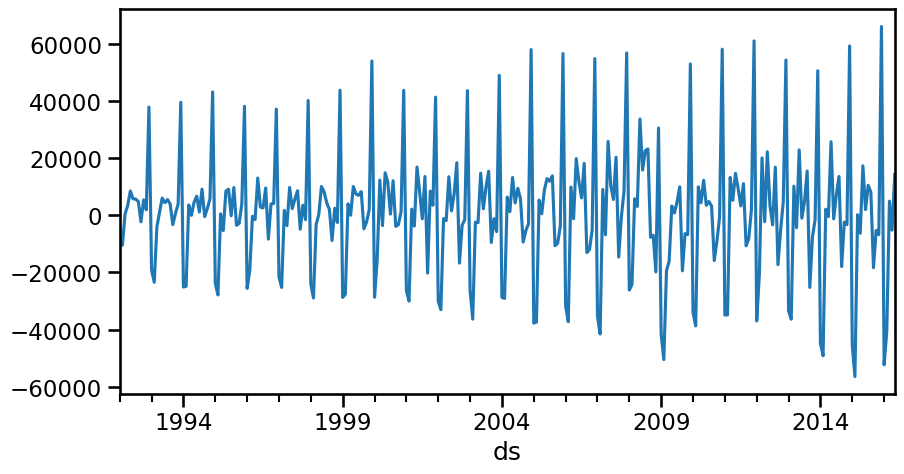

In [28]:
# Compute the trend with LOWESS
frac = 0.1 # window size smoothing - 10% of the data each measure.
y = df["y"]
x = np.arange(0, len(y))
res = lowess(endog=y, exog=x, frac=frac)
df["lowess"] = res[:, 1]

df["y_detrend"] = df["y"] - df["lowess"]
df["y_detrend"].plot(figsize=(10, 5))

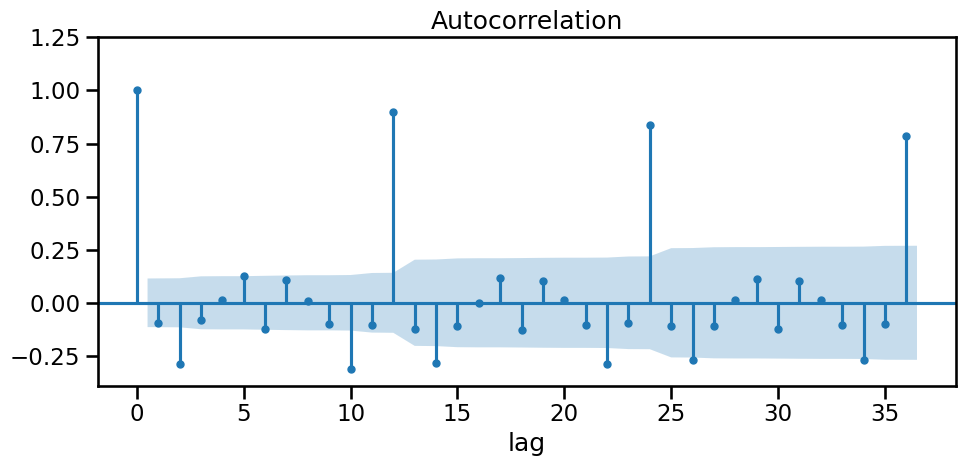

In [18]:
# Plot the auto correlation of the de-trend data
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df["y_detrend"],
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_xlabel("lag")
plt.tight_layout()

Why we see correlation only in lag_12?

That's becase the data is **seasionality yearly**.  

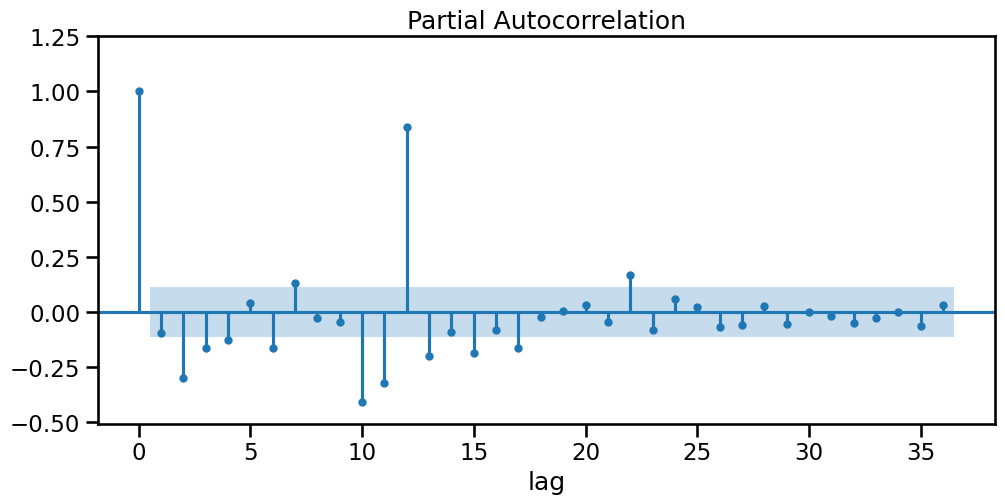

In [31]:
# Plot the partial auto correlation

fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y_detrend"],
    method='ywmle', # Recommended method in Statsmodels notes
    lags=36,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_xlabel("lag")
plt.tight_layout()

The PACF shows a strong lag at 12 but not at multiples of 12 afterwards. This means that most of the predictive information from the seasonal lag is captured at lag 12 as expected!


In summary this would suggest that we could create features using a lag of 12 (from the seasonality) and low lags like 1, 2, 3, and 4. The other larger lags such as lag 10, 11, or 13 are more difficult to intrepret. One reason for not including them is that you do not see peaks at multiples of 10, 11, or 13 in the ACF. Also from domain knowledge (this is retail sales) it is highly unlikely that lags beyond 12 months will be that relevant.

# PACF after detrending and deseasonalising the original series

Now that we know the period of any seasonality we can remove the impact of the trend and seasonal components on the ACF to help identify useful lags. 

The retail sales example has one seasonality with period 12 so let's use STL. If the time series has multiple seasonal periods (e.g., daily and weekly) then use MSTL to help detrend and deseasonalise the time series. We will show an example with multiple seasonalities in notebook 8 of this section.

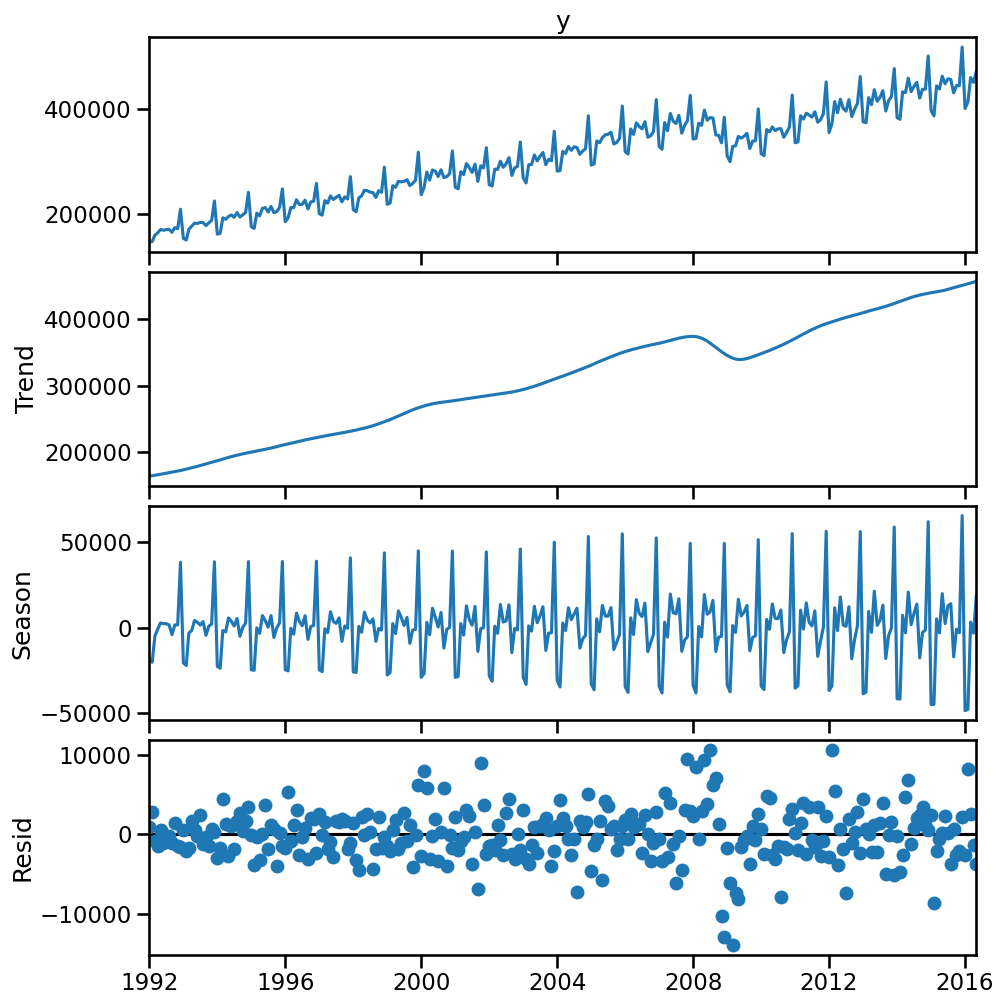

In [20]:
# Break the timeseries into trend, seasonality, and residual components
res = STL(df["y"]).fit()

# Plot the full decomposition
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
res.plot();

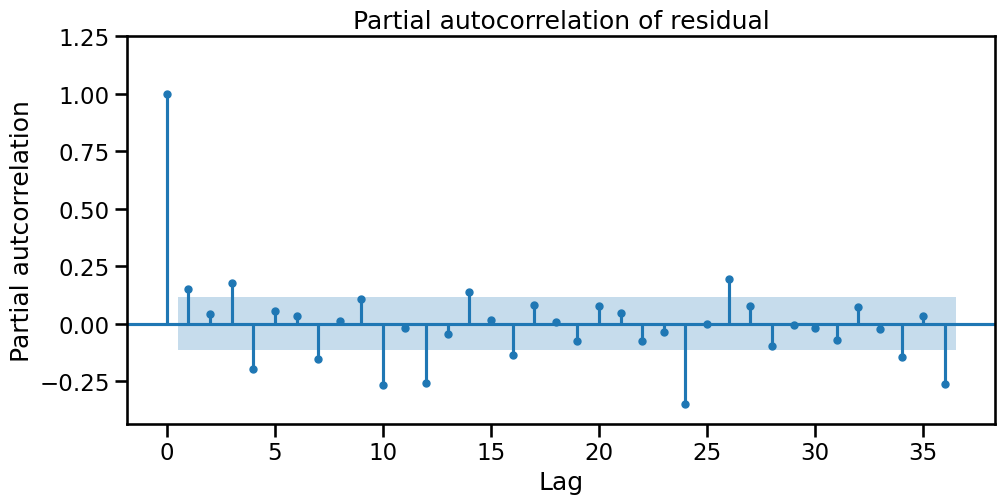

In [21]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=res.resid,
    lags=36,
    method='ywmle', # Recommended method in Statsmodels notes
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Partial autocorrelation of residual")
ax.set_ylabel("Partial autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

We can see that there aren't any large significant lags. There appears to be some significant lags at multiples of 12 which suggests that some part of the seasonal component is still in the residuals and was not perfectly extracted by STL. Practically speaking from looking at this plot there wouldn't be an additional lag beyond 1 or 2 that we would want to add for feature engineering purposes.

There we have it! We have shown how we can use the PACF for different types of time series to understand which lags could be useful as features. We will show how to use the PACF for a more challenging real world example in notebook 8.